# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Random selection of latitude and longitude 

lat = np.random.choice(range(-90,90),2000)
lng = np.random.choice(range(-180,180),2000)

lat_lng = pd.DataFrame({"Lat":lat,"Long":lng})        

#print(len(lat_lng)
lat_lng.head()

,Lat,Long
0,43,162
1,83,-117
2,40,-144
3,87,121
4,4,-18


In [4]:
#Use citipy to merge them to nearest city
#Create new columns for the city name: 
lat_lng["city_name"] = ""
lat_lng["country"] = ""
#LatLon.head()
for index,row in lat_lng.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Long"])
    lat_lng.set_value(index,"city_name",city.city_name)
    lat_lng.set_value(index,"country",city.country_code)

print(f"The length of the dataframe is: {len(lat_lng)}")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


The length of the dataframe is: 2000


In [5]:
#Clean it for missing values
nr_lat_lng = lat_lng.dropna()
print(f"The length of the cleaned dataframe is:{len(nr_lat_lng)}")


nr_lat_lng = nr_lat_lng.drop_duplicates()
print(f"The length of the dataframe after dropping the duplicates is: {len(nr_lat_lng)}")

# Sample for "at least" 500 cities 
sample = nr_lat_lng.sample(750)
sample =sample.reset_index()
sample = sample.iloc[:,[1,2,3,4]]
print(f"The length of the sample is: {len(sample)}")

sample.head()

The length of the cleaned dataframe is:2000
The length of the dataframe after dropping the duplicates is: 1969
The length of the sample is: 750


,Lat,Long,city_name,country
0,80,-136,tuktoyaktuk,ca
1,86,-101,yellowknife,ca
2,-43,-101,castro,cl
3,-73,107,albany,au
4,-38,-97,lebu,cl


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# OpenWeatherMap API Key
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid":"7bbe5eb80fc0e9d5e7535b057e554fd5","units":"imperial" }

#Print the base url 

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

for index,row in sample.iterrows():
    params["q"] =f'{row["city_name"]},{row["country"]}'
    print(f"Processing Record {index+1} of {len(sample)}")
    response = requests.get(url,params)
    print(response.url)
    formatted_response = response.json()
    sample.set_value(index,"Latitude",formatted_response.get("coord",{}).get("lat"))
    sample.set_value(index,"Longitude",formatted_response.get("coord",{}).get("lon"))
    sample.set_value(index,"Temperature",formatted_response.get("main",{}).get("temp"))
    sample.set_value(index,"Max Temperature",formatted_response.get("main",{}).get("temp_max"))
    sample.set_value(index,"Humidity",formatted_response.get("main",{}).get("humidity"))
    sample.set_value(index,"Wind speed",formatted_response.get("wind",{}).get("speed"))
    sample.set_value(index,"Cloudiness",formatted_response.get("clouds",{}).get("all"))
    sample.set_value(index,"Date",formatted_response.get("dt"))

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=tuktoyaktuk%2Cca


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

Processing Record 2 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=yellowknife%2Cca
Processing Record 3 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=castro%2Ccl
Processing Record 4 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=albany%2Cau
Processing Record 5 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=lebu%2Ccl
Processing Record 6 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=qaanaaq%2Cgl
Processing Record 7 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=sibolga%2Cid
Processing Record 8 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=shilong%2Ccn


http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=narsaq%2Cgl
Processing Record 60 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=albany%2Cau
Processing Record 61 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=brazzaville%2Ccg
Processing Record 62 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=lebu%2Ccl
Processing Record 63 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=butaritari%2Cki
Processing Record 64 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=ushuaia%2Car
Processing Record 65 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=kilis%2Ctr
Processing Record 66

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=nguiu%2Cau
Processing Record 117 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=ushuaia%2Car
Processing Record 118 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=barentsburg%2Csj
Processing Record 119 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=codrington%2Cag
Processing Record 120 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=hobart%2Cau
Processing Record 121 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=toliary%2Cmg
Processing Record 122 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=saint-georges%2Cgf
Proc

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=isangel%2Cvu
Processing Record 174 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=vaini%2Cto
Processing Record 175 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=mosquera%2Cco
Processing Record 176 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=margate%2Cza
Processing Record 177 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=hermanus%2Cza
Processing Record 178 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=bluff%2Cnz
Processing Record 179 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=cabo+san+lucas%2Cmx
Processin

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=nikolskoye%2Cru
Processing Record 230 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=port+blair%2Cin
Processing Record 231 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=sabang%2Cid
Processing Record 232 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=punta+arenas%2Ccl
Processing Record 233 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=anloga%2Cgh
Processing Record 234 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=rikitea%2Cpf
Processing Record 235 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=poum%2Cnc
Processi

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=ust-kuyga%2Cru
Processing Record 286 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=clinton%2Cus
Processing Record 287 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=bambous+virieux%2Cmu
Processing Record 288 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=tasiilaq%2Cgl
Processing Record 289 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=punta+arenas%2Ccl
Processing Record 290 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=upernavik%2Cgl
Processing Record 291 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=lapy%2Cpl

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=chokurdakh%2Cru
Processing Record 342 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=busselton%2Cau
Processing Record 343 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=carmo+do+rio+claro%2Cbr
Processing Record 344 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=lata%2Csb
Processing Record 345 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=mindelo%2Ccv
Processing Record 346 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=newport%2Cus
Processing Record 347 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=cape+town%2Cza

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=bacolod%2Cph
Processing Record 398 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=jamestown%2Csh
Processing Record 399 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=ancud%2Ccl
Processing Record 400 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=cape+town%2Cza
Processing Record 401 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=severo-kurilsk%2Cru
Processing Record 402 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=qaanaaq%2Cgl
Processing Record 403 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=taolanaro%2Cmg
Pro

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=mahebourg%2Cmu
Processing Record 454 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=urumqi%2Ccn
Processing Record 455 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=cidreira%2Cbr
Processing Record 456 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=thompson%2Cca
Processing Record 457 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=rocha%2Cuy
Processing Record 458 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=wolgast%2Cde
Processing Record 459 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=vaini%2Cto
Processing Reco

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=avare%2Cbr
Processing Record 512 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=fairlie%2Cnz
Processing Record 513 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=punta+arenas%2Ccl
Processing Record 514 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=pasighat%2Cin
Processing Record 515 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=punta+arenas%2Ccl
Processing Record 516 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=belushya+guba%2Cru
Processing Record 517 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=araouane%2Cm

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=bathsheba%2Cbb
Processing Record 569 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=rikitea%2Cpf
Processing Record 570 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=lebu%2Ccl
Processing Record 571 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=ushuaia%2Car
Processing Record 572 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=ushuaia%2Car
Processing Record 573 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=caravelas%2Cbr
Processing Record 574 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=itarema%2Cbr
Processing Re

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=portland%2Cau
Processing Record 627 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=yuzhno-yeniseyskiy%2Cru
Processing Record 628 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=cheney%2Cus
Processing Record 629 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=kaitangata%2Cnz
Processing Record 630 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=yellowknife%2Cca
Processing Record 631 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=puerto+ayora%2Cec
Processing Record 632 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=flin

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=east+london%2Cza
Processing Record 684 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=bluff%2Cnz
Processing Record 685 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=provideniya%2Cru
Processing Record 686 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=creel%2Cmx
Processing Record 687 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=atuona%2Cpf
Processing Record 688 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=puerto+ayora%2Cec
Processing Record 689 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=kapaa%2Cus
Processi

http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=lukovetskiy%2Cru
Processing Record 741 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=attawapiskat%2Cca
Processing Record 742 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=andros+town%2Cbs
Processing Record 743 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=saint-joseph%2Cre
Processing Record 744 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=hobart%2Cau
Processing Record 745 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=hithadhoo%2Cmv
Processing Record 746 of 750
http://api.openweathermap.org/data/2.5/weather?appid=7bbe5eb80fc0e9d5e7535b057e554fd5&units=imperial&q=ushuaia%

In [8]:
#Clean the retrieved data
sample = sample.dropna()
#Create a dataframe
weatherPy = pd.DataFrame({"city_name":sample["city_name"],
                          "country":sample["country"],
                         "cloudiness":sample["Cloudiness"],
                         "humidity":sample["Humidity"],
                         "lat":sample["Latitude"],
                         "lng":sample["Longitude"],
                        "temperature":sample["Temperature"],
                          "max_temp":sample["Max Temperature"],
                         "wind speed":sample["Wind speed"],
                          "date":sample["Date"]})

weatherPy["date"]=weatherPy["date"].astype('int')
# Save as CSV
weatherPy.to_csv("weatherPy.csv")
weatherPy.count()

city_name      650
country        650
cloudiness     650
humidity       650
lat            650
lng            650
temperature    650
max_temp       650
wind speed     650
date           650
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weatherPy.describe()

,cloudiness,humidity,lat,lng,temperature,max_temp,wind speed,date
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,6.500000e+02
mean,45.366154,75.672308,3.645923,2.965985,56.525015,57.163738,11.477554,1.554322e+09
std,33.421039,22.796115,40.935050,97.814557,22.119168,22.131688,8.433020,1.823252e+03
min,0.000000,9.000000,-54.810000,-175.200000,-4.060000,-4.060000,1.010000,1.554318e+09
25%,12.000000,60.000000,-33.640000,-70.910000,42.800000,43.132500,4.380000,1.554322e+09
50%,40.000000,78.000000,-4.445000,-2.885000,60.900000,61.370000,9.980000,1.554323e+09
75%,75.000000,93.000000,41.752500,98.117500,75.305000,76.770000,16.110000,1.554323e+09
max,100.000000,319.000000,78.220000,179.320000,95.040000,95.040000,42.970000,1.554323e+09


In [26]:
#Convert the CSV into a dataframe for the plotting purposes
weatherPy_plt = pd.read_csv("weatherPy.csv")
weatherPy_plt.head()

,Unnamed: 0,city_name,country,cloudiness,humidity,lat,lng,temperature,max_temp,wind speed,date
0,0,tuktoyaktuk,ca,75.0,77.0,69.44,-133.03,-2.21,-2.21,18.34,1554318000
1,1,yellowknife,ca,20.0,59.0,62.45,-114.38,5.02,7.00,12.75,1554322846
2,2,castro,cl,90.0,93.0,-42.48,-73.76,51.80,51.80,14.99,1554318000
3,3,albany,au,75.0,100.0,-35.02,117.88,60.80,60.80,3.36,1554318000
4,4,lebu,cl,100.0,95.0,-37.62,-73.65,56.34,56.34,15.68,1554322852


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

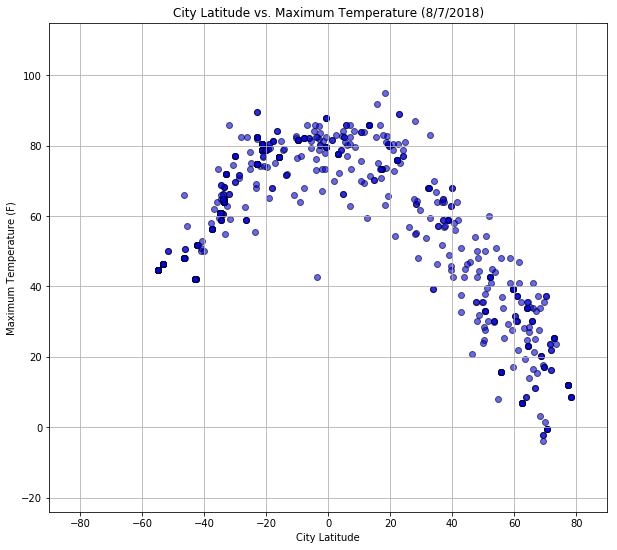

In [24]:
#Analysis: Maximum Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['max_temp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(weatherPy_plt['max_temp'])-20, max(weatherPy_plt['max_temp'])+20)
ax.set_xlabel("City Latitude")
ax.set_ylabel("Maximum Temperature (F)")
ax.set_title("City Latitude vs. Maximum Temperature (8/7/2018)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Maximum_Temperature.png")
plt.grid()
plt.show()

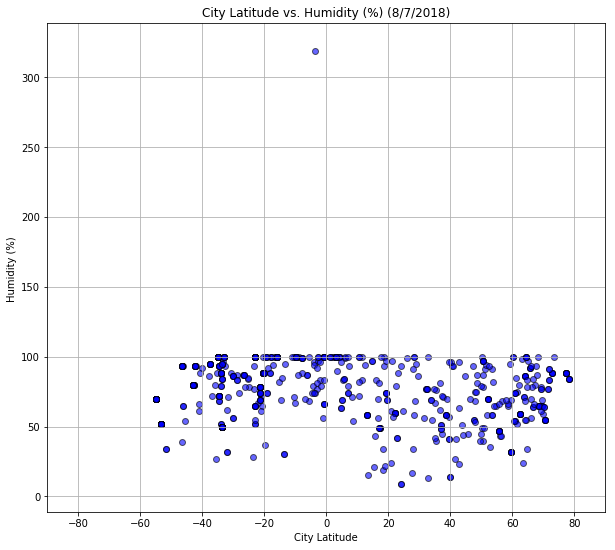

In [23]:
#Analysis 2: Humidity (%) vs. Latitude
fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['humidity'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(weatherPy_plt['humidity'])-20, max(weatherPy_plt['humidity'])+20)
ax.set_xlabel("City Latitude")
ax.set_ylabel("Humidity (%) ")
ax.set_title("City Latitude vs. Humidity (%) (8/7/2018)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Humidity (%).png")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

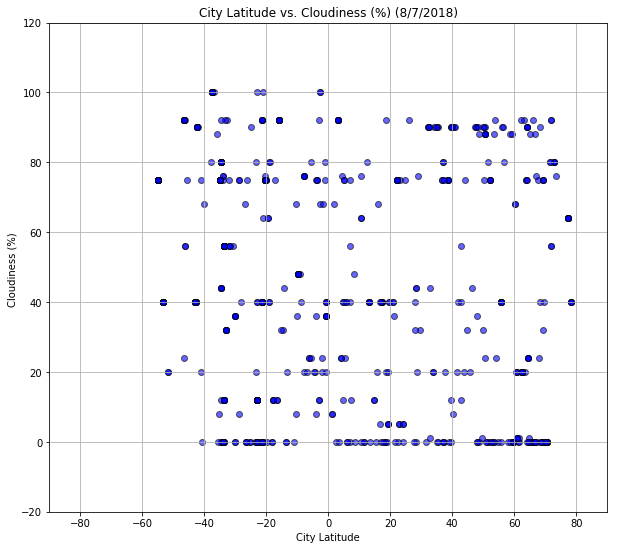

In [22]:
#Analysis 3. Cloudiness (%) vs. Latitude
fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['cloudiness'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(weatherPy_plt['cloudiness'])-20, max(weatherPy_plt['cloudiness'])+20)
ax.set_xlabel("City Latitude")
ax.set_ylabel("Cloudiness (%) ")
ax.set_title("City Latitude vs. Cloudiness (%) (8/7/2018)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Cloudiness (%).png")
plt.grid()
plt.show()

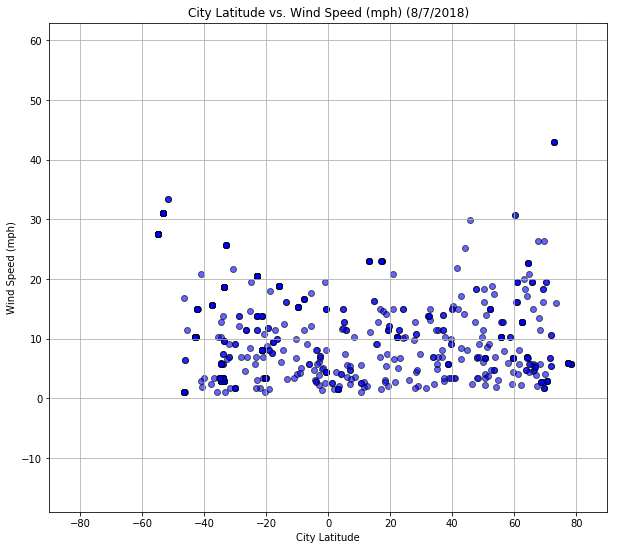

In [21]:
#Analysis 4. Wind Speed (mph) vs. Latitude

fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['wind speed'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(weatherPy_plt['wind speed'])-20, max(weatherPy_plt['wind speed'])+20)
ax.set_xlabel("City Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (mph) (8/7/2018)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Wind Speed (mph).png")
plt.grid()
plt.show()